In [7]:
import sys
from pathlib import Path

parent_dir = Path.cwd().parent.parent
sys.path.append(str(parent_dir))

In [8]:
from data_processing.image_processing import ImageProcessor
import numpy as np
import cv2
import dlib
import cv2
from matplotlib import pyplot as plt
from glob import glob
import os
import pandas as pd

In [9]:
# Global initialization
global_detector = dlib.get_frontal_face_detector()
global_predictor = dlib.shape_predictor('../shape_predictor_68_face_landmarks.dat')
global_sr_model = cv2.dnn_superres.DnnSuperResImpl_create()
global_sr_model.readModel("../EDSR_x4.pb")
global_sr_model.setModel("edsr", 4)
ImageProcessor = ImageProcessor(global_detector, global_predictor, global_sr_model)

In [10]:
def get_combined_eyes(frame, global_detector, global_predictor, target_size=(200, 100)):
    """
    Detects, enhances, and combines the eye regions including the nose bridge from the frame.
    Args:
        frame: The input image frame.
        global_detector: Face detector.
        global_predictor: Landmark predictor.
        target_size: Target size for resizing the combined eye region.
    Returns:
        The combined eye regions including the nose bridge, or None if not detected.
    """
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = global_detector(gray)

    # super resolution image
    for face in faces:
        landmarks = global_predictor(gray, face)


        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show()

        # Define points around the eyes and the bridge of the nose.
        #forhead 
        forehead_points = [20, 21, 22, 23, 0 ,16]
        left_eye_points = [36, 37, 38, 39, 40, 41]
        right_eye_points = [42, 43, 44, 45, 46, 47]
        nose_bridge_points = [27, 28, 29]  # Adjust if necessary for your landmarks

        # Extract the combined region of both eyes including the nose bridge
        # Make sure to only use the first returned value (the image)

        combined_eye_region, _ = ImageProcessor.extract_eye_region(
            frame, landmarks, left_eye_points, right_eye_points, nose_bridge_points, forehead_points)

        if isinstance(combined_eye_region, np.ndarray):

            # Apply super-resolution
            # combined_eye_super_res = ImageProcessor.enhance_image_resolution(combined_eye_region, global_sr_model)

            # Resize to the final target size
            combined_eye_final_resized = cv2.resize(combined_eye_region, target_size, interpolation=cv2.INTER_AREA)

            # combined_eye_final_resized = cv2.cvtColor(combined_eye_final_resized, cv2.COLOR_BGR2GRAY)


            # Normalize if necessary
            combined_eye_final_resized = combined_eye_final_resized.astype(np.float32) / 255.0

            return combined_eye_final_resized

    return None

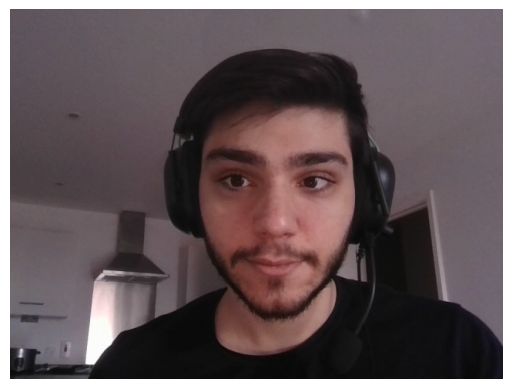

(100, 200, 3)


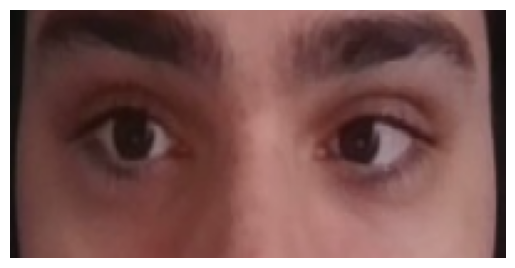

In [11]:
image = cv2.imread('../data/muzzy/calibration_images/muzzy_03c250a4-1e82-48cb-9d1b-79d14449b757.png')
# Simulating the combined_eye extraction process
combined_eye = get_combined_eyes(image,global_detector, global_predictor)
print(combined_eye.shape  )
# If the image is valid (not None), display it using matplotlib
if combined_eye is not None:
    plt.imshow(cv2.cvtColor(combined_eye, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
else:
    print("No combined eye region was detected.")